# Heart Failure Perdiction

Medical Real World Problem Statement:-

Cardiovascular diseases (CVDs) are number 1 cause of death globaiiy, taking an estimate 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 1 features that can be used to predict mortality by heart failure.

I will be developing a machine learning model to help in early detection of mortality in orxer to save people.

The 12 features include:-
    Age, Gender, Blood pressure, Smoke, Diabetes, Ejection Fraction, Creatinine phosphokinase, Serum Creatinine, Serum sodium, Time.
    
Dataset link:- https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data    

## Loading and Exploring the Data

In [ ]:
# Importing the neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Uploading the dataset into google collab

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv
User uploaded file "heart_failure_clinical_records_dataset (1).csv" with length 12239 bytes


In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print("Shape of the data", data.shape)


Shape of the data (299, 13)


In [ ]:
print("Information about the data:-")
data.info()


Information about the data:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usag

In [ ]:
print("Describing the data:-")
data.describe()

Describing the data:-


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
print(f"No. of Null Values:-")
data.isnull().sum().sum()

No. of Null Values:-


0

## Exploratory data Analysis

Total Number of Living cases:-  203
Total Number of Dead cases:-  96


([<matplotlib.patches.Wedge at 0x7f09737df040>,
 [Text(-0.6395818636688131, 1.0153497129885485, 'LIVING'),
  Text(0.6395817686049089, -1.01534977287052, 'DIED')])

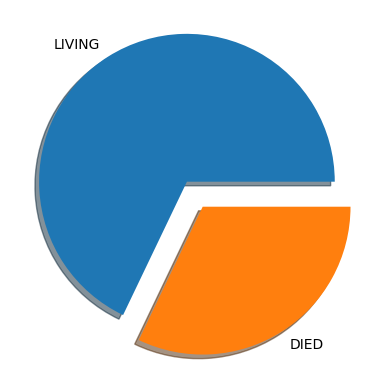

In [ ]:
# Seeing the distribution of classes, this will help us identify which type is prevalent
len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_die = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

Arr = np.array([len_live, len_die])
labels = ['LIVING', 'DIED']
print("Total Number of Living cases:- ", len_live)
print("Total Number of Dead cases:- ", len_die)

plt.pie(Arr, labels=labels, explode=[0.1,0.1], shadow=True)

#inference:- The data is imbalanced, the clases are not equally distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

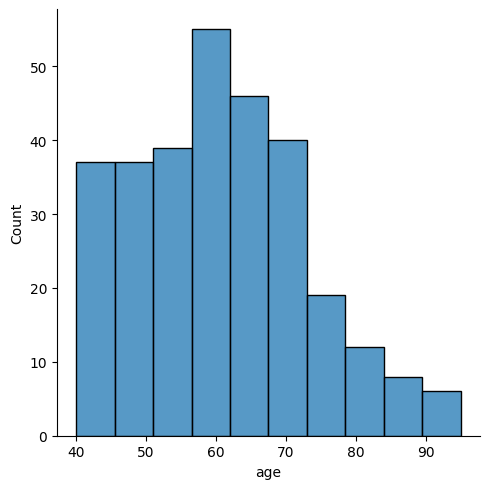

In [ ]:
# Seeing the distribution of Age
sns.displot(data["age"])
plt.show

Total no. of dead cases:-  85
Total no. of living cases:-  167


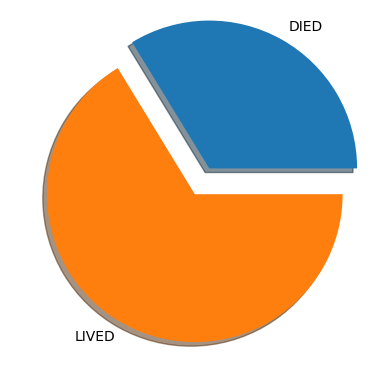

In [ ]:
# Selecting rows with age above 50 and checking mortality
age_above_50_live= len(data["age"][data.age>=50][data.DEATH_EVENT ==0])
age_above_50_die= len(data["age"][data.age>=50][data.DEATH_EVENT ==1])

Arr1 = [age_above_50_die, age_above_50_live]
labels = ['DIED', 'LIVED']

print("Total no. of dead cases:- ", age_above_50_die)
print("Total no. of living cases:- ", age_above_50_live)

plt.pie(Arr1, labels=labels, explode= [0.2,0.0], shadow=True)
plt.show()

#inference:- Most people above the age of 50 lived

Total no. of Patients that died with Diabetes:-  40
Total no. of Patients that lived with Diabetes:-  118


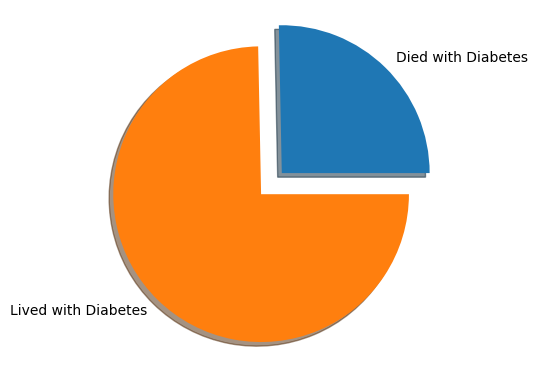

In [ ]:
# Chcking the mortality of patients with and without diabetes
patient_with_diabetes_live = data["diabetes"][data.diabetes == 0][data.DEATH_EVENT ==0]
patient_with_diabetes_dead = data["diabetes"][data.diabetes == 1][data.DEATH_EVENT ==1]

len_d_live = len(patient_with_diabetes_live)
len_d_dead = len(patient_with_diabetes_dead)

Arr2 = [len_d_dead, len_d_live]
labels= ['Died with Diabetes', 'Lived with Diabetes']

print("Total no. of Patients that died with Diabetes:- ", len_d_dead)
print("Total no. of Patients that lived with Diabetes:- ", len_d_live)

plt.pie(Arr2, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

#inference:- Most people that have diabetes lived

<Axes: >

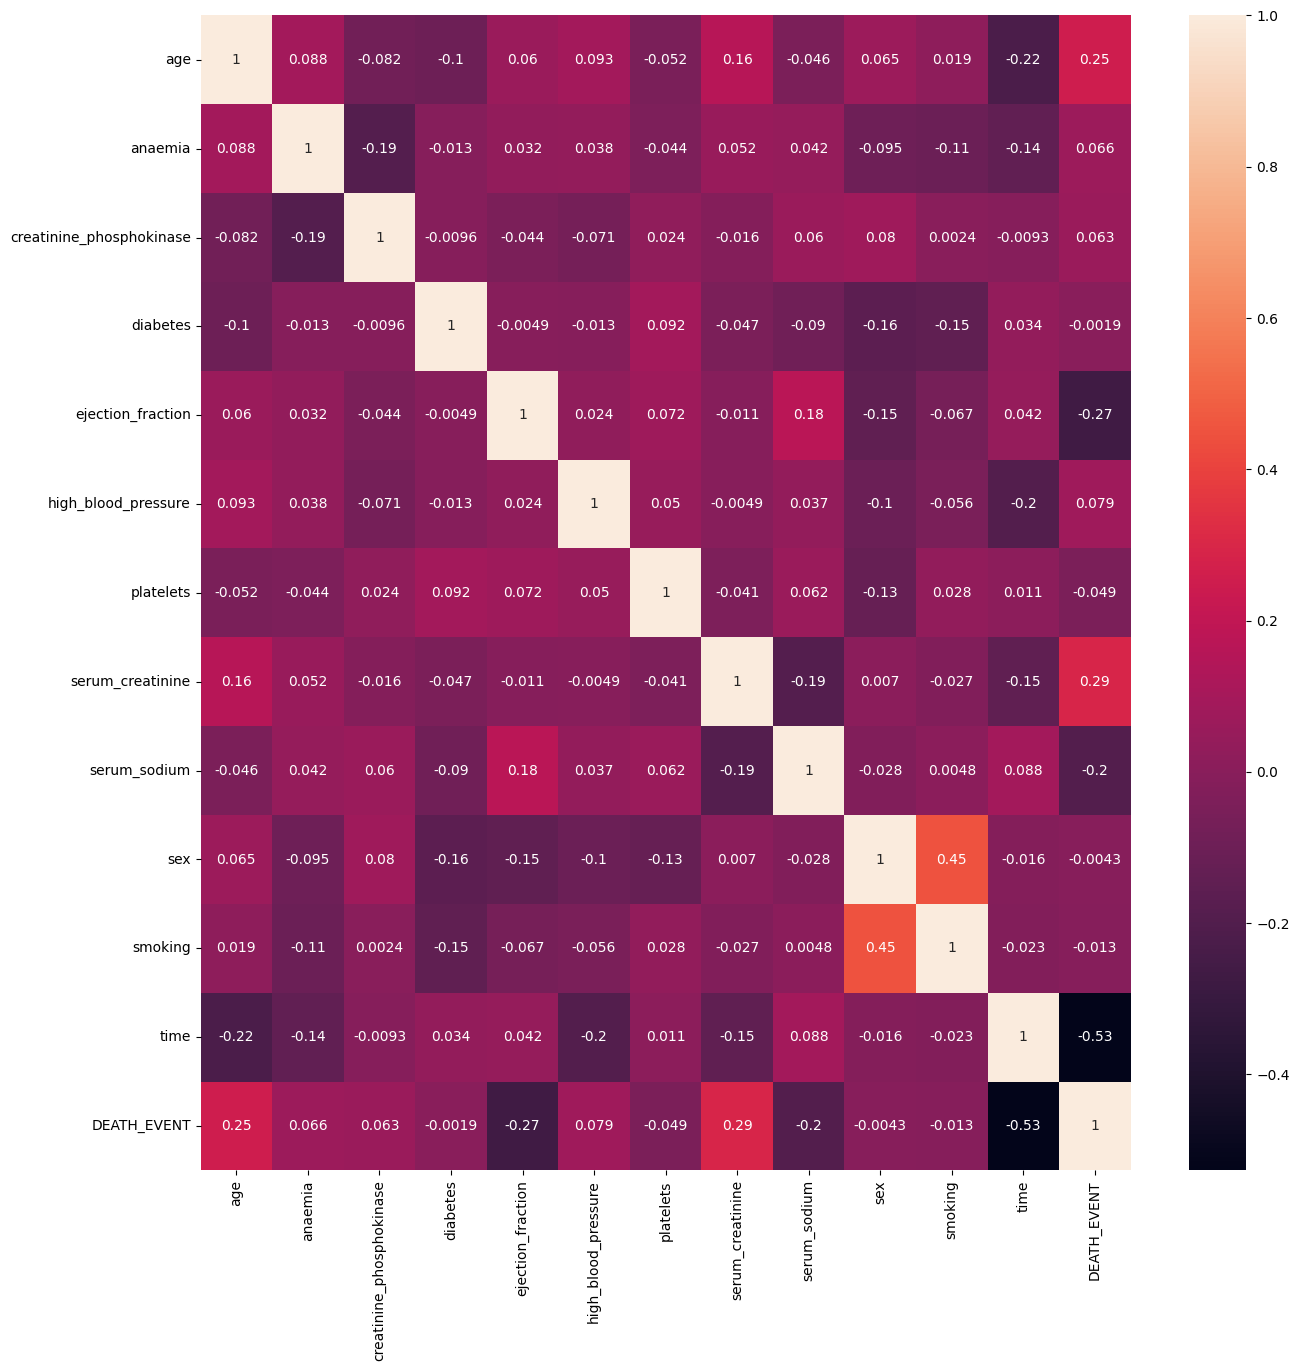

In [ ]:
# Checking the correlation of our variables
corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot= True)

# inference:- The most correlating variables are age and high_blood_pressure while the least are time and DEATH_EVENT

In [ ]:
data.corr().style.background_gradient(cmap='cool_r')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Dataset development

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("DEATH_EVENT", axis = 1)
y = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)
print("Shape of the X_train: ", X_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (209, 12)
Shape of the X_test:  (90, 12)
Shape of the y_train:  (209,)
Shape of the y_test:  (90,)


## Model Building

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    '''
    Function for evaluating models
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred))
    print("Recall Score:- ", recall_score(y_test, y_pred))
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))


In [ ]:
# Building a Logistic Regression model as a baseline model

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

In [ ]:
evaluating_model(y_test, y_pred)

Accuracy Score:-  0.7888888888888889
Precision Score:-  0.7647058823529411
Recall Score:-  0.4642857142857143
Confusion Matrix:- 
 [[58  4]
 [15 13]]


In [ ]:
#Building Logistic Regressor with StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(X_train, y_train)

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test, y_pred1)


Accuracy Score:-  0.8111111111111111
Precision Score:-  0.7894736842105263
Recall Score:-  0.5357142857142857
Confusion Matrix:- 
 [[58  4]
 [13 15]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining Parameter range
param_grid = {"C":[0.1, 1, 10, 100, 1000],
             "gamma": [1,0.1, 0.01, 0.001, 0.0001],
             "kernel": ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_estimator_


SVC(C=10, gamma=0.0001)

In [ ]:
svc = SVC(C=10, gamma=0.0001)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
evaluating_model(y_test, y_pred2)

Accuracy Score:-  0.6777777777777778
Precision Score:-  0.4
Recall Score:-  0.07142857142857142
Confusion Matrix:- 
 [[59  3]
 [26  2]]


In [ ]:
# Using the DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=10, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test score: {:.3f}".format(accuracy))

    return best_model

randomized_search(params = {'criterion': ['entropy','gini'],
                           'splitter': ['random', 'best'],
                           'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
                           'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
                           'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
                           'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.20],
                           'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                           'max_features': ['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                           'max_depth': [None, 2, 4, 6, 8],
                           })

Training score: 0.842
Test score: 0.856


DecisionTreeClassifier(max_depth=4, max_features=0.75, max_leaf_nodes=40,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=8, min_weight_fraction_leaf=0.0025,
                       random_state=2)

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=4, max_features=0.75, max_leaf_nodes=40,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=8, min_weight_fraction_leaf=0.0025,
                       random_state=2)
dt_clf.fit(X_train, y_train)
y_pred4 = dt_clf.predict(X_test)
evaluating_model(y_test, y_pred4)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8571428571428571
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[59  3]
 [10 18]]


In [ ]:
#Using the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

randomized_search(params = {'min_samples_leaf': [1,2,4,6,8,10,20,30],
                           'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.20],
                           'max_features': ['auto', 0.80, 0.7, 0.6, 0.5, 0.4],
                           'max_depth': [None, 2, 4, 6, 8,10,20]
                           }, clf =RandomForestClassifier(random_state=2) )

Training score: 0.847
Test score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [ ]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)
rf_clf.fit(X_test, y_test)
y_pred5 = rf_clf.predict(X_test)
evaluating_model(y_test, y_pred5)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8947368421052632
Recall Score:-  0.6071428571428571
Confusion Matrix:- 
 [[60  2]
 [11 17]]


In [ ]:
# Using XGBoost classifier

from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                     learning_rate = 0.1,
                     max_depth = 4,
                     n_estimator = 400,
                     subsample = 1.0)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = "logloss", eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.57444
[1]	validation_0-logloss:0.53675
[2]	validation_0-logloss:0.50777
[3]	validation_0-logloss:0.48659
[4]	validation_0-logloss:0.46540
[5]	validation_0-logloss:0.45034
[6]	validation_0-logloss:0.43492
[7]	validation_0-logloss:0.42562
[8]	validation_0-logloss:0.41523
[9]	validation_0-logloss:0.40096
[10]	validation_0-logloss:0.39540
[11]	validation_0-logloss:0.38980
[12]	validation_0-logloss:0.38287
[13]	validation_0-logloss:0.37953
[14]	validation_0-logloss:0.37523
[15]	validation_0-logloss:0.37315
[16]	validation_0-logloss:0.37093
[17]	validation_0-logloss:0.36779
[18]	validation_0-logloss:0.36587
[19]	validation_0-logloss:0.36552
[20]	validation_0-logloss:0.36157
[21]	validation_0-logloss:0.35722
[22]	validation_0-logloss:0.35401
[23]	validation_0-logloss:0.35249
[24]	validation_0-logloss:0.35012


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[25]	validation_0-logloss:0.35006
[26]	validation_0-logloss:0.34743
[27]	validation_0-logloss:0.34570
[28]	validation_0-logloss:0.34361
[29]	validation_0-logloss:0.34192
[30]	validation_0-logloss:0.34045
[31]	validation_0-logloss:0.33929
[32]	validation_0-logloss:0.34078
[33]	validation_0-logloss:0.34032
[34]	validation_0-logloss:0.34012
[35]	validation_0-logloss:0.33832
[36]	validation_0-logloss:0.33671
[37]	validation_0-logloss:0.33686
[38]	validation_0-logloss:0.33517
[39]	validation_0-logloss:0.33569
[40]	validation_0-logloss:0.33376
[41]	validation_0-logloss:0.33427
[42]	validation_0-logloss:0.33305
[43]	validation_0-logloss:0.33380
[44]	validation_0-logloss:0.33292
[45]	validation_0-logloss:0.33400
[46]	validation_0-logloss:0.33343
[47]	validation_0-logloss:0.33305
[48]	validation_0-logloss:0.33454
[49]	validation_0-logloss:0.33444
[50]	validation_0-logloss:0.33242
[51]	validation_0-logloss:0.33226
[52]	validation_0-logloss:0.33101
[53]	validation_0-logloss:0.33103
[54]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=400, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred6 = xgb1.predict(X_test)
evaluating_model(y_test, y_pred6)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8
Recall Score:-  0.7142857142857143
Confusion Matrix:- 
 [[57  5]
 [ 8 20]]


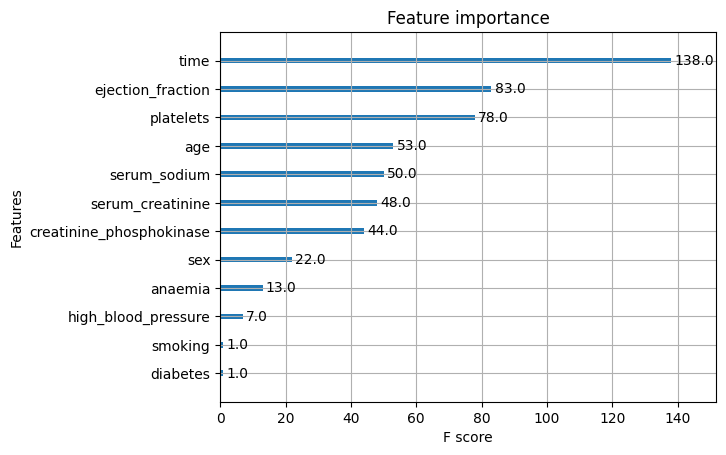

In [ ]:
# Showing the importance of each feature
from xgboost import plot_importance
#xgb.feature_importance_
plot_importance(xgb1)
plt.show()

In [ ]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth = 1, random_state = 0)
gbdt.fit(X_train, y_train)

pred_gbdt = gbdt.predict(X_test)
evaluating_model(y_test, pred_gbdt)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8571428571428571
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[59  3]
 [10 18]]


## Choosing the best model and saving them

In [ ]:
# We choose XGBoost

import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl')
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])